In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('scraping/team_per_game_2013-22.csv')
pred_data = pd.read_csv('scraping/team_per_game_2023.csv')
data.head()

,Team,Year,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB%,FT/FGA,Op_eFG%,Op_TOV%,DRB%,FT/FGA4,Attend.,Attend./G,Payroll_Over_Avg,Playoff_W
0,Atlanta Hawks,2022,240.3,41.5,88.3,0.470,12.9,34.4,0.374,28.6,...,23.0,0.205,0.543,11.5,76.9,0.177,672742.0,16408.0,1.044973,1
1,Boston Celtics,2022,242.7,40.7,87.4,0.466,13.2,37.1,0.356,27.5,...,24.0,0.195,0.502,12.5,77.3,0.183,785396.0,19156.0,1.235269,14
2,Brooklyn Nets,2022,240.9,42.0,88.4,0.475,11.5,31.7,0.361,30.5,...,23.9,0.198,0.521,11.7,75.1,0.201,711539.0,17355.0,1.275167,0
3,Charlotte Hornets,2022,242.4,42.8,91.4,0.468,13.9,38.2,0.365,28.8,...,23.3,0.173,0.544,13.1,74.8,0.187,700755.0,17092.0,0.793724,0
4,Chicago Bulls,2022,240.6,41.7,86.9,0.480,10.6,28.8,0.369,31.1,...,20.4,0.201,0.541,11.9,78.3,0.199,856148.0,20882.0,1.045515,1


In [3]:
corr = data.corr().abs()
corr = corr.loc[corr['Playoff_W']>.25]
corr.index
variables = list(corr.index)

<AxesSubplot:title={'center':'Correlation between Filtered Variables'}>

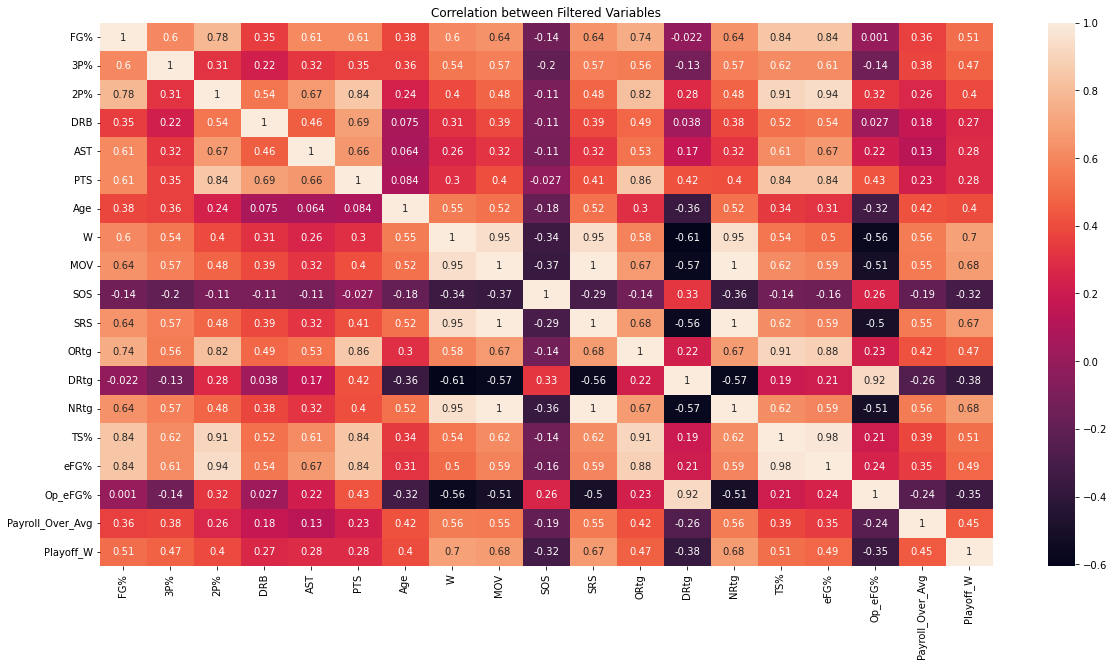

In [4]:
plt.figure(figsize=(20,10))
plt.title("Correlation between Filtered Variables")
sns.heatmap(data=data[variables].corr(), annot=True)

In [5]:
remove = ['MOV','Payroll_Over_Avg']
variables = [item for item in variables if item not in remove]
variables

['FG%',
 '3P%',
 '2P%',
 'DRB',
 'AST',
 'PTS',
 'Age',
 'W',
 'SOS',
 'SRS',
 'ORtg',
 'DRtg',
 'NRtg',
 'TS%',
 'eFG%',
 'Op_eFG%',
 'Playoff_W']

In [6]:
X = data[variables].drop('Playoff_W',1)
y = data['Playoff_W']

pred_X = pred_data[variables].drop('Playoff_W',1)

X.head()

C:\Users\whisk\AppData\Local\Temp\ipykernel_15036\3407789263.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data[variables].drop('Playoff_W',1)
C:\Users\whisk\AppData\Local\Temp\ipykernel_15036\3407789263.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pred_X = pred_data[variables].drop('Playoff_W',1)


,FG%,3P%,2P%,DRB,AST,PTS,Age,W,SOS,SRS,ORtg,DRtg,NRtg,TS%,eFG%,Op_eFG%
0,0.470,0.374,0.531,33.9,24.6,113.9,26.1,43,-0.01,1.55,116.5,114.9,1.6,0.581,0.543,0.543
1,0.466,0.356,0.547,35.5,24.8,111.8,26.1,51,-0.26,7.02,114.4,106.9,7.5,0.578,0.542,0.502
2,0.475,0.361,0.538,34.1,25.3,112.9,29.1,44,0.04,0.82,113.6,112.8,0.8,0.576,0.540,0.521
3,0.468,0.365,0.542,33.7,28.1,115.3,25.5,43,0.09,0.53,114.1,113.7,0.4,0.572,0.544,0.544
4,0.480,0.369,0.535,33.7,23.9,111.6,26.3,46,0.02,-0.38,113.2,113.6,-0.4,0.579,0.541,0.541


In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y)
model = LinearRegression().fit(X_train, y_train)
model_predicted_wins = model.predict(X_valid)

In [8]:
model_predicted_wins = model.predict(pred_X)
model_predicted_wins

array([ 0.90078125, -1.03183594, -1.73203125, -1.70615234,  0.4828125 ,
       -4.30234375, -4.10507813, -0.13046875, -4.76425781, -3.37070313,
       -1.58652344, -0.48618164, -4.48044434, -4.60214844,  1.18203125,
       -2.72861328, -2.44980469, -0.6173825 ,  0.63710937, -6.37949219,
       -7.24570313, -3.6265625 , -1.7515625 , -0.5640625 , -4.15      ,
       -5.56015625, -2.18222656, -5.36289063, -1.59238281, -0.3989624 ])

In [9]:
model_predicted_wins_df = pred_data[['Team','Playoff_W']]
 
for i in range (30):
    model_predicted_wins_df.at[i, 'Playoff_W'] = model_predicted_wins[i]
    i+=1
model_predicted_wins_df.sort_values(by='Playoff_W',ascending=False)

,Team,Playoff_W
14,Brooklyn Nets,1.182031
0,Boston Celtics,0.900781
18,Philadelphia 76ers,0.637109
4,Golden State Warriors,0.482812
7,Denver Nuggets,-0.130469
29,Los Angeles Clippers,-0.398962
11,Indiana Pacers,-0.486182
23,Cleveland Cavaliers,-0.564063
17,Portland Trail Blazers,-0.617383
1,Sacramento Kings,-1.031836


(-11.7605, 12.4505, -4.5463671875000005, 16.9783984375)

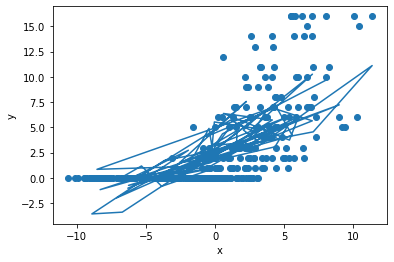

In [15]:
# plot the results
ax = plt.axes()
ax.scatter(X['SRS'], y)
ax.plot(X_valid['SRS'], model.predict(X_valid))

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')